Introducción a la Teoría de Control
=====
Con Matlab
========

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está en <b>borrador</b> y puede estar incompleto y/o sufrir modificaciones</font>
___

[![Chapters](https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&logo=GitBook&logoColor=white)](https://elc.github.io/control)
[![Github Repo](https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&logo=github&logoColor=white)](https://github.com/ELC/control-theory-with-matlab)
[![Questions](https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge)](https://github.com/ELC/control-theory-with-matlab/issues)

In [ ]:
%plot inline --format=png -w 1600 -h 500

In [2]:
format compact;

# Sistemas de Primer Orden

Al utilizarse sistemas de primer orden, si la función de transferencia es **propia**, entonces su forma está definida por

$$G=\frac{a\cdot s+b}{c\cdot s+d}~,~a,b,c,d\in \mathbb{R}$$

Esto es así ya que $Y(s)$no puede contener términos de grado mayor a $2$ ya que eso implicaría derivadas de grado $2$ o superior. Y si el sistema es propio, esto implica que el numerador no puede tener un grado mayor al denominador. 

Se tienen dos casos, cuando $G$ tiene un cero y cuando no tiene ningún cero

$$G=\frac{b}{s+\frac{d}{c}},~~~~G=\frac{s+\frac{b}{a}}{s+\frac{d}{c}}$$ 

La forma con un cero suele representarse como

$$G~~=~~k\frac{\frac{s}{z}+1}{\frac{s}{p}+1}~~=~~\frac{k\cdot p}{z}\cdot \frac{s+z}{s+p}$$

Y la forma sin cero suele representarse como:


$G=k\frac{p}{s+p}$ o también $G=k\frac{1}{\frac{s}{p}+1}$


En este caso al valor $\frac{1}{p}$ se le conoce como **constante de tiempo} y se representa con $\tau$ quedando

$$G=k\frac{1}{\tau \cdot s+1}$$

# Polos y Ceros

# Lazo Abierto y Lazo Cerrado

## Funciones de transferencia en Matlab

En matlab existen diversas formas de declarar funciones de transferencia

**Declarando la variable compleja** $s$

Usando la variable compleja $s$ pueden especificarse las funciones de transferencia como cociente de polinomios, como polos y ceros o una combinación de ambos

In [3]:
s = tf("s");
sistema = ((s+2)*(s+1)) / ((s+2)*(s+1)*(s+1.5))           % Polos y Ceros


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [4]:
sistema = (s^2 + 3*s + 2) / (s^3 + 4.5*s^2 + 6.5*s + 3)   % Cociente de Polinomios


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [5]:
sistema = (s^2 + 3*s + 2) / ((s+2)*(s+1)*(s+1.5))         % Combinación


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




**Especificando los coeficientes del numerador y denominador**

Para utilizar sólamente los coeficientes del numerador y el denominador, se utiliza la función **``tf``**.

In [6]:
sistema = tf([1 3 2], [1 4.5 6.5 3])


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




**Especificando los polos y ceros**

Para definir la función de transferencia con polos y ceros, se utiliza la función **``zpk``**, que además toma un tercer parámetro que es la ganancia

In [7]:
sistema = zpk([-2; -1], [-2, -1, -1.5], 1)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




## Ceros y polos de una función de transferencia

Independientemente de la forma en la que la función de transferencia haya sido creada, es posible obtener sus ceros y polos con las funciones **``zero``** y **``pole``**

In [8]:
ceros = zero(sistema);
polos = pole(sistema);
ceros, polos

ceros =
    -2
    -1
polos =
   -2.0000
   -1.0000
   -1.5000



## Convirtiendo de un formato a otro

De ceros y polos a coeficientes usando **``zp2tf``**

In [9]:
ceros = [-2; -1];
polos = [-2, -1, -1.5];
sistema = zpk(ceros, polos, 1)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




In [10]:
[numerador, denominador] = zp2tf(ceros, polos, 1);
sistema = tf(numerador, denominador)


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




De cociente de polinomios a polos y ceros **``tf2zp``**

In [11]:
numerador = [1 3 2];
denominador = [1 4.5 6.5 3];
sistema = tf(numerador, denominador)


sistema =
 
        s^2 + 3 s + 2
  -------------------------
  s^3 + 4.5 s^2 + 6.5 s + 3
 
Continuous-time transfer function.




In [12]:
[polos, ceros, ganancia] = tf2zp(numerador, denominador);
sistema = zpk(polos, ceros, ganancia)


sistema =
 
      (s+2) (s+1)
  -------------------
  (s+2) (s+1.5) (s+1)
 
Continuous-time zero/pole/gain model.




## Respuesta del sistema

La respuesta del sistema $y(t)$está totalmente definida dada la **función de transferencia** $G$ y una entrada $x(t)$

A continuación se muestra como un sistema de primer orden responde a diferentes tipos de entrada

### Definiendo el sistema

Primero se define la variable compleja $s$ y un sistema de primer orden sin ceros y con un polo en $p$

In [13]:
s = tf("s");

tiempo = 0:0.01:2;
tau =0.2;
primer_orden = 1 / (tau*s + 1);

### Entrada Impulso

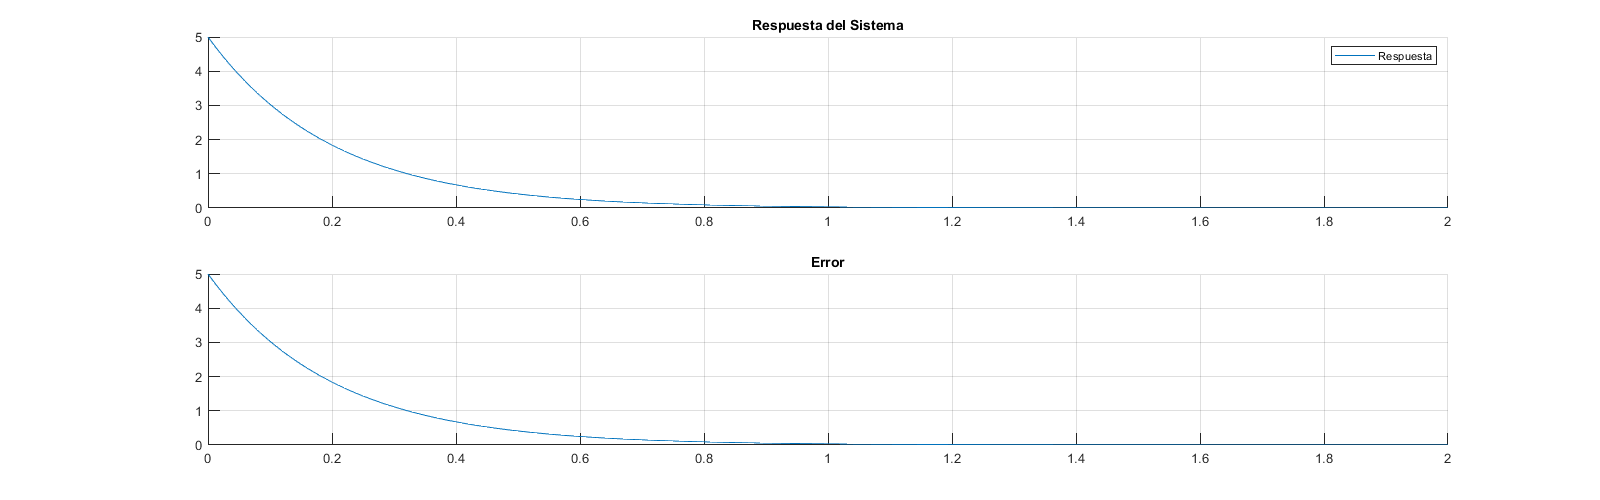

In [14]:
respuesta = impulse(primer_orden, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, transpose(respuesta))

legend('Respuesta')
title("Respuesta del Sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')

plot(tiempo, respuesta)

title("Error")
grid on

### Entrada Escalón

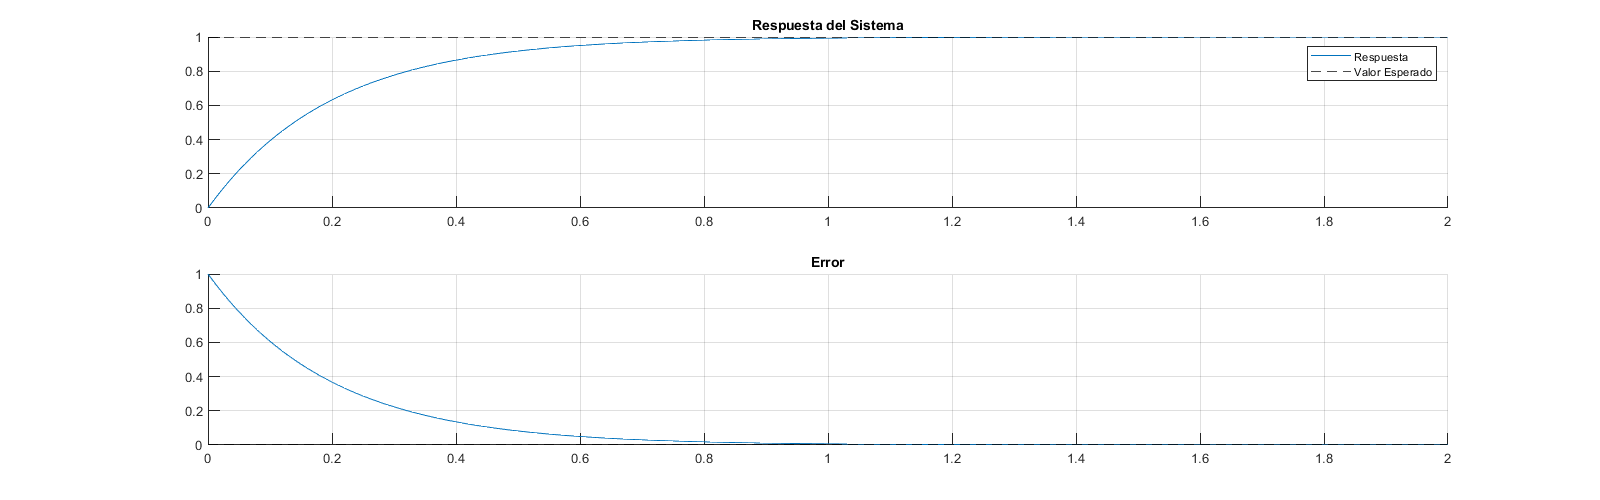

In [15]:
valor_esperado = 1;
respuesta = step(valor_esperado * primer_orden, tiempo);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, transpose(respuesta))

yline(ax, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del Sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')

plot(tiempo, valor_esperado - respuesta)

yline(0, "--k")
title("Error")
grid on

### Entrada Rampa

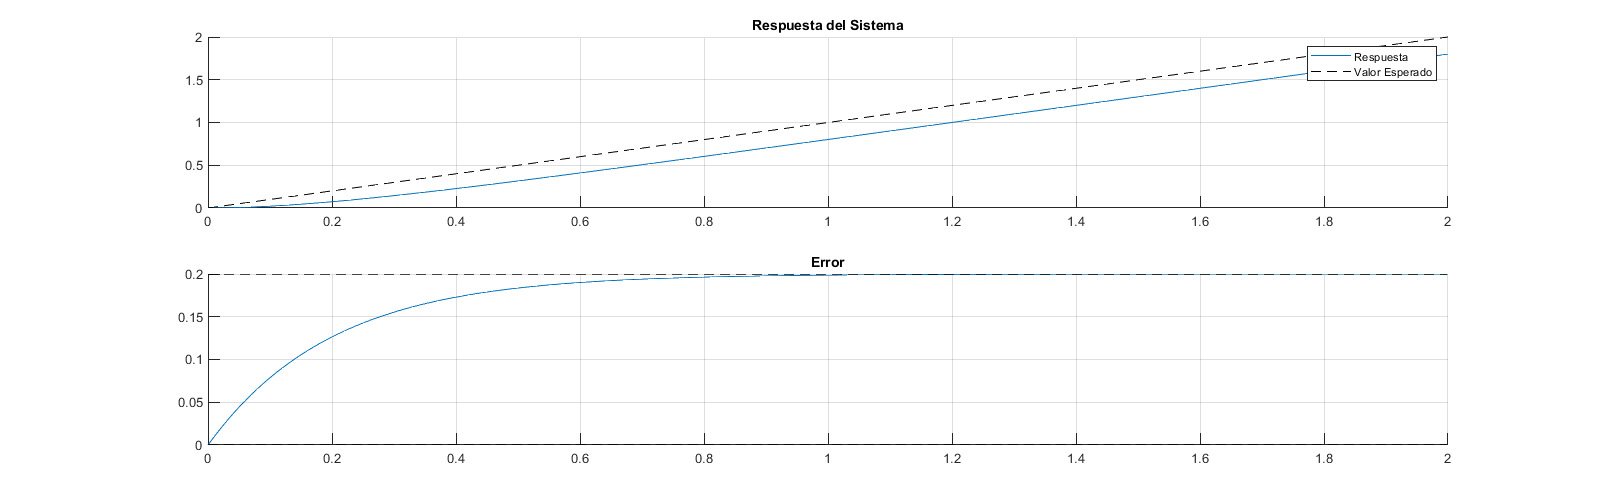

In [16]:
valor_esperado = tiempo;
respuesta = step(primer_orden / s, tiempo);
respuesta = transpose(respuesta);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
grid on
title("Respuesta del Sistema")

ax = subplot(2,1,2);
hold(ax, 'on')
error = valor_esperado - respuesta;
plot(tiempo, error)
yline(error(end), "--k")
yline(0, "--k")
title("Error")
grid on

### Entrada Parabola

En este caso, si la entrada es una parábola, se puede ver como el error crece a infinito

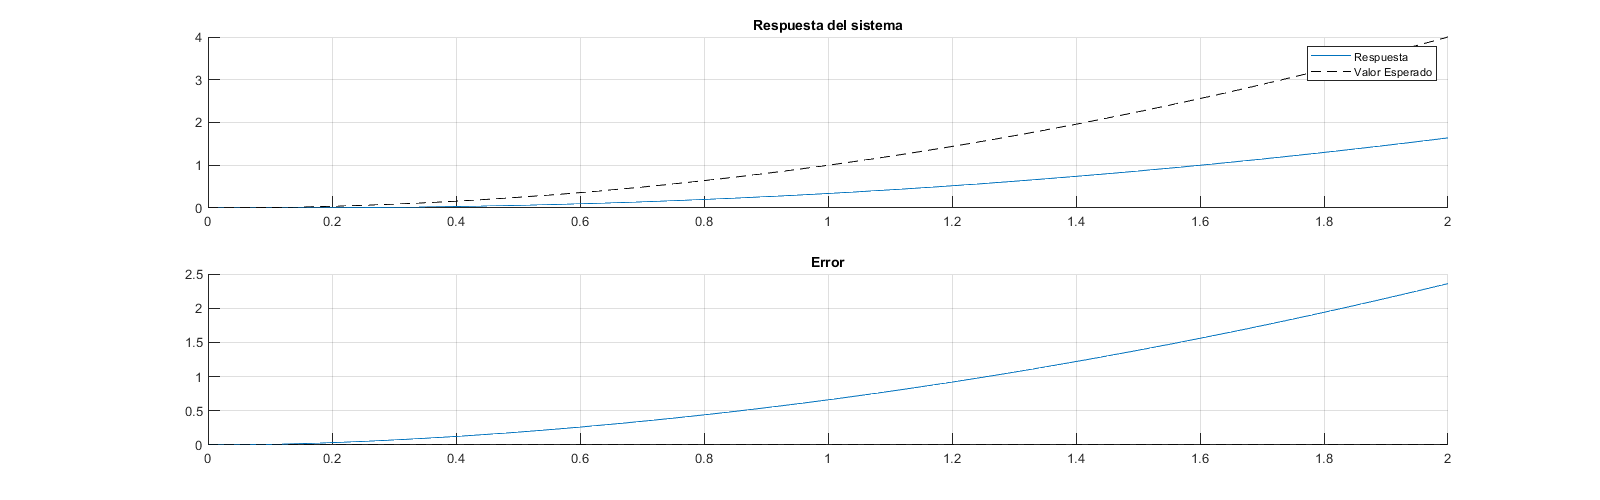

In [17]:
valor_esperado = tiempo .* tiempo;
respuesta = step(primer_orden / s^2, tiempo);
respuesta = transpose(respuesta);

figure;

ax = subplot(2,1,1);
hold(ax, 'on')

plot(ax, tiempo, respuesta)
plot(ax, tiempo, valor_esperado, "--k")
legend('Respuesta', 'Valor Esperado')
title("Respuesta del sistema")
grid on

ax = subplot(2,1,2);
hold(ax, 'on')
plot(tiempo, valor_esperado - respuesta)
yline(0, "--k")
title("Error")
grid on